# PHYS 381 - Assignment #2  
#### January 29, 2018
John Ming Ngo (30020834)

Kenneth Barry Sharman (00300185)

### 1) Use numpy.polynomial.legendre to generate a single plot showing the first five Legendre polynomials  with order from $N=1$ up to and including $N=5$ between $x=−1$ and $x=+1$

In [8]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First we define a function that will place objects of type Legendre into a numpy array. Each element of the array holds the unevaluated legendre function of a specific degree.

In [9]:
def genLegPoly(degree):
    """
    Function generates legendre polynomial objects from 1 
    to the specified degree. Each object is successively 
    added to an array, which is returned by the function. 
    
    Params:
        degree: Highest degree of legendre polynomial added 
        to array
    Returns:
        lPolys: A list of Legendre Polynomial Objects 
        with degrees from 1 to the degree specified.
    """
    lPolys = []    
    list = np.array([1])
    for i in range(degree):
        list = np.insert(list,0,0)
        y = np.polynomial.legendre.Legendre(list)
        lPolys = np.append(lPolys,y)
    return lPolys

Next, we create a function that creates a visually appealing plot with legendre polynomials up to a specified degree. Since all degrees of legendre polynomial are defined in the interval [-1,1], the x-values of the plot are built into the function. 

In [10]:
def createLegendrePlot(degree):
    """
    This function, given an input degree, plots legendre
    polynomials from degree zero to that degree. Plot has customized
    size, limits, grid, x-axis labels, title, and legend.
    
    Params:
        degree: How high a degree of legendre polynomials
        you want generated.
    """
    # Set the plot size
    plt.figure(figsize=(10,5))
    
    # Intialize x-values for plot
    x = np.arange(-1,1,0.01)
    
    # The legendre function is evaluated, and plotted, against the set x-values for
    # each degree. A labelled is given to each function in order to indicate in legend. 
    for i in range(degree):
        curve = "N=" + str(i+1)
        plt.plot(x,genLegPoly(degree)[i](x), label = curve)
     
    # For degree less than 10: Add legend to upper left corner, with a shadow, grey in 
    # color, and semi-transparent. The number of elements in the legend is restricted in 
    # order to ensure that the output to reasonable.
    if degree<10:
        legend = plt.legend(loc='upper left', shadow=(True))
        frame = legend.get_frame()
        frame.set_facecolor('#f9f9f9')
        frame.set_alpha(0.6)
    
    # Add grid with solid lines to graph
    plt.grid(linestyle='dashed')

    # Set x and y axis range
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)

    # Label vertical & horizontal axis and add graph title.
    plt.xlabel('x-values')
    plt.ylabel('$P_{n}(x)$')
    plt.title('Legendre Polynomials of Degree $N$')

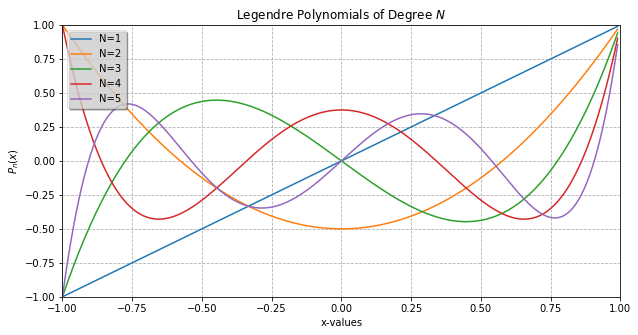

In [11]:
# Call above function to display plot of legendre polynomials
createLegendrePlot(5)

### 2) Use scipy.optimize.brentq to find all of the zeros of the Legendre polynomials with order from $N=1$ up to and including $N=5$.

We will use brentq to determine the roots of legendre polynomials, which can be generated using the function genLegPoly froom question #1.

In [86]:
def findLegRoots(degree):
    '''
    Function displays roots of all legendre poylnomials from
    degree 1 to specified degree. The interval [-1,1] is considered
    as x-values outside this range are not of interest when dealing
    with legendre polynomials
    
    Params:
        degree: Highest degree of legendre polynomial added 
        to array  
    '''
    print("\t*** Roots of Legendre Polynomials ***")
    
    # Create an array containing legendre polynomial functions
    # from one to specified degree.
    leg_list = genLegPoly(degree)
    
    # The number of roots degree on the degree, thus we slice the
    # interval [-1,1] into sub-intervals for which brentq will analyze.
    interval = 2.0/degree
    
    # For each function in the leg_list array, brentq will check each
    # interval for roots.
    for i in range(degree):
        start = -1
        end = start + interval
        print("Degree N=", i+1)
        while (end < 1.2):
            if (leg_list[i](start)*leg_list[i](end) < 0):
                xzero = opt.brentq(leg_list[i], start, end, xtol=1.0e-8, rtol=1.0e-14, maxiter=50 )
                print( '\tsolution  x: %5.2f'% xzero,'y: %9.2e' % leg_list[i](xzero))
            start += interval
            end += interval

In [87]:
# Call findLegRoots to determine and display roots of first 5
# Legendre Polynomial functions
findLegRoots(5)

	*** Roots of Legendre Polynomials ***
Degree N= 1
	solution  x:  0.00 y:  0.00e+00
Degree N= 2
	solution  x: -0.58 y: -2.31e-11
	solution  x:  0.58 y: -2.31e-11
Degree N= 3
	solution  x: -0.77 y:  2.95e-11
	solution  x: -0.00 y:  4.16e-17
	solution  x:  0.77 y: -2.95e-11
Degree N= 4
	solution  x: -0.86 y:  1.12e-13
	solution  x: -0.34 y: -2.22e-11
	solution  x:  0.34 y: -2.22e-11
	solution  x:  0.86 y:  1.12e-13
Degree N= 5
	solution  x: -0.91 y:  6.87e-10
	solution  x: -0.54 y: -1.79e-11
	solution  x:  0.00 y:  1.04e-16
	solution  x:  0.54 y:  1.79e-11
	solution  x:  0.91 y: -6.87e-10


### 3) Write a function to find zeros using the "secant method".  This is very similar to Newton's method, but uses a discrete estimate for the derivative.

In [106]:
def secantRootFinder(function, xBegin, xEnd, yTolorance = 1e-12):
    """
    Function tries to find a root of a function, in a specific interval.
    The secant method is employed to estimate the root, by assuming the 
    function is linear in the interval in question. x-y coordinates of
    root are displayed once the function value is within the tolerance 
    range specified.
    
    Params:
        function: Unevaluated function
        xBegin: Start of interval to be analyzed
        xEnd: End of interval to be analyzed
        yTolerance: Zero interval precision range
    """
    # Determine function value at endpoint of interval in question.
    yCheck = abs(function(xEnd))
    
    # Loop runs until the function value lies within the zero range as
    # specified by the yTolerance variable. Root and function value are
    # displayed.
    
    while yCheck >= yTolorance:
        xOld = xEnd
        xEnd = xEnd - function(xEnd) * (xEnd-xBegin) / (function(xEnd)-function(xBegin))
        xBegin = xOld
        yCheck = abs(function(xEnd))
    print('Root: x = %5.2f'% xEnd, 'y = %9.2e'% function(xEnd))

### 4) Apply your secant method function to find the roots of a Legendre polynomial for $N=5$.
We will create a function that determines the roots of a particular function, within a range which is specified by an array of x-values.

### Note:
This function was implemented as #5 originally called for the use of secantRootFinder. It specifically manipulates an array in such a way that can be used for the endpoints of an interval.

In [111]:
def evalSecantRootFinder(xValues, function):
    '''
    Function creates start and end point lists, corresponding
    to the x-values passed, in order to itterate through the
    range of x-values. For each sub-interval the secantRootFinder
    is called to determine if roots can be found.
    
    Params:
        xValues: Array of x-values used to determine start/ end
        points used by the secantRootFinder function.
        function: Unevaluated function to be analyzed
    '''
    x = xValues
    start = []
    end = []
    print("*** Roots of Legendre Polynomial ***")
    
    # Create list with elements corresponding to passed x-values
    for i in range(0,x.size,2):
        start.append(x[i])
    # Create list starting with second element of passed x-values
    for i in range(1, x.size, 2):
        end.append(x[i])
    # Using start and stop values in created lists, secantRootFinder
    # is called to determine roots of function is each sub-interval.
    for i in range(len(end)):
        secantRootFinder(function,start[i],end[i])

In [116]:
# Divide the interval [-1,1] into 10 sub-intervals and check for 
# roots using secantRootFinder
evalSecantRootFinder(np.linspace(-1,1,10), genLegPoly(5)[4])

*** Roots of Legendre Polynomial ***
Root: x = -0.91 y =  2.15e-13
Root: x = -0.54 y =  1.11e-16
Root: x =  0.00 y =  2.60e-17
Root: x =  0.54 y = -1.11e-16
Root: x =  0.91 y = -1.15e-14


For N=5 we see that both the findLegRoots and the secantRootFinder both found the roots expected from the graph in question #1. It should be noted that the secantRootFinder was able to narrow down the root values to a much smaller tolerance than that of the findLegRoots function. Using both these functions gives us a better understanding of the factors involved when determining the value of a function as evaluated by a computer. 

### 5) Apply the scipy.optimize.newton method function to the “myfunc” function. Use a range of different starting points as given by x = np.linspace(-1.0, 10.0, 101) and find the resulting roots. Discuss your results

In [120]:
# Function defined in the class notes
def myfunc(x, b=0.4):
    return b*x - np.tan(x)

In [224]:
def newtonZeros(x, function):
    x = np.linspace(-1.0, 10.0, 101)
    for element in x:
        try:
            xzero = (opt.newton(function, element, fprime=None, args=(), tol=1.48e-08, maxiter=50, fprime2=None))
            print( 'x: %5.2f'% xzero,'y: %9.2e' % function(xzero))
        except:
             pass

In [225]:
newtonZeros(np.linspace(-1.0, 10.0, 101), myfunc)

x: -0.00 y:  2.81e-18
x: -0.00 y:  6.89e-25
x: -0.00 y:  7.80e-17
x: -0.00 y:  9.95e-22
x: -0.00 y:  8.94e-28
x: -0.00 y:  3.03e-18
x: -0.00 y:  2.56e-23
x: -0.00 y:  1.89e-30
x: -0.00 y:  2.47e-21
x: -0.00 y:  2.71e-23
x:  0.00 y: -5.41e-23
x:  0.00 y: -3.02e-16
x:  0.00 y: -1.99e-24
x:  0.00 y: -4.64e-19
x:  0.00 y: -4.83e-29
x:  0.00 y: -9.86e-23
x:  0.00 y: -1.19e-17
x:  0.00 y: -3.10e-26
x:  0.00 y: -2.19e-19
x:  0.00 y: -1.10e-26
x:  0.00 y: -1.42e-17
x:  0.00 y: -6.83e-20
x:  0.00 y: -3.19e-17
x:  0.00 y: -1.07e-19
x:  4.17 y:  1.55e-15
x:  4.17 y: -1.33e-15
x:  0.00 y: -4.20e-26
x:  4.17 y: -1.33e-15
x:  0.00 y: -2.49e-20
x:  4.17 y:  7.55e-15
x:  4.17 y: -1.33e-15
x:  4.17 y:  1.55e-15
x:  4.17 y:  3.57e-13
x:  0.00 y: -4.18e-18
x:  0.00 y: -6.15e-30
x:  0.00 y: -2.06e-17
x: -0.00 y:  1.15e-19
x:  0.00 y: -8.87e-32
x:  0.00 y: -2.27e-17
x:  4.17 y:  4.66e-15
x:  4.17 y: -1.33e-15
x:  4.17 y:  3.14e-13
x:  4.17 y: -6.44e-14
x:  4.17 y: -1.33e-15
x:  4.17 y: -1.61e-13
x:  4.17 y

We see, with random repetition, that the zeros of myfunc on [-1,10] are: 
x=0, x=4.17, x=7.53

We will compre the roots we found with a quick plot of the myfunc function on the interval [-1,10] 

In [202]:
def myFuncPlot():
    '''
    Function plots myfunc from [-1,10] 
    '''
    x = np.linspace( -1.5, 10, 500)
    y = myfunc(x)
    y[ y < 0.0 ] = np.nan  # skip plotting negative values

    plt.plot( x, y, 'g', label="$y=myfunc(x)$")

    plt.title('myfunc Graph to Show Roots')
    plt.xlabel('x (radians)')
    plt.ylabel('myfunc(x)')
    plt.ylim( 0, 5 )
    plt.legend(loc='upper right')

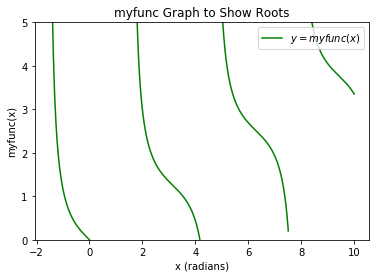

In [203]:
myFuncPlot()

It appears from this plot that x=0 x=4.17 and x=7.53 are indeed all the roots of myfunc on the interval [-1,10]